In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

C:\Users\vikio\AppData\Local\Temp\ipykernel_23156\2836724294.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
height = 32
width = 64
size = height*width
path = "..\..\datasets\\UNSW_NB15"
csv_file = path + "\\unswnb15_img.csv"

In [56]:
df = pd.read_csv(path+"\\UNSW_converted_data.csv")

In [57]:
df = df.drop_duplicates()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59168 entries, 0 to 79879
Columns: 1505 entries, payload_byte_1 to label
dtypes: float64(1), int64(1502), object(2)
memory usage: 679.8+ MB


In [59]:
df.columns

Index(['payload_byte_1', 'payload_byte_2', 'payload_byte_3', 'payload_byte_4',
       'payload_byte_5', 'payload_byte_6', 'payload_byte_7', 'payload_byte_8',
       'payload_byte_9', 'payload_byte_10',
       ...
       'payload_byte_1496', 'payload_byte_1497', 'payload_byte_1498',
       'payload_byte_1499', 'payload_byte_1500', 'ttl', 'total_len',
       'protocol', 't_delta', 'label'],
      dtype='object', length=1505)

In [60]:
df.protocol.unique()

array(['others', 'pipe', 'ipip', 'rdp', 'micp', 'crtp', 'snp', 'vmtp',
       'tcp', 'etherip', 'leaf-2', 'gre', 'ax.25', 'nvp', 'sctp', 'sep',
       'unas', 'iplt', 'gmtp', 'secure-vmtp', 'sun-nd', 'ib', 'swipe',
       'sps', 'hmp', 'rsvp', 'egp', 'ospf', 'mobile', 'ipv6', 'fire',
       'pim', 'ggp', 'sccopmce', 'dgp', 'emcon', 'crudp', 'fc', 'udp',
       'arp', 'icmp'], dtype=object)

In [61]:
len(df.protocol.unique())

41

In [62]:
indices = list(df.protocol.unique())

In [63]:
indices.index("tcp")

8

In [64]:
# move tcp to end of list
indices.remove("tcp")
indices.append("tcp")
indices.index("tcp")

40

In [65]:
indices.index("udp")

37

In [66]:
# move udp to start of list
indices.remove("udp")
indices = ["udp"] + indices
indices.index("udp")

0

In [67]:
df.protocol = df.protocol.apply(lambda x: indices.index(x))

In [69]:
df.protocol.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 40,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37,  0, 38, 39], dtype=int64)

In [70]:
df.label.unique()

array(['analysis', 'backdoor', 'dos', 'exploits', 'fuzzers', 'generic',
       'normal', 'reconnaissance', 'shellcode', 'worms'], dtype=object)

In [71]:
len(df.label.unique())

10

In [72]:
df = df.to_numpy()
df.shape

(59168, 1505)

In [73]:
# normalize payload, ttl, total_len
for col_index in range(df.shape[1]-1):
    column = df[:, col_index]
    column_normalized = (column - np.min(column)) / (np.max(column) - np.min(column) + 0.1)
    df[:, col_index] = column_normalized

(1504,)
analysis
(2048,)
(32, 64)


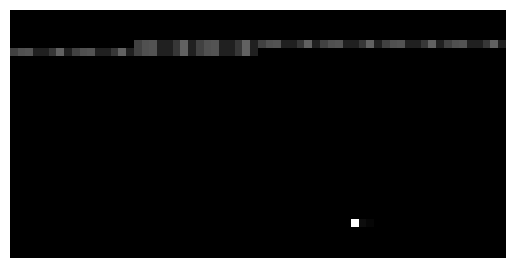

DONE


In [75]:
def convert_dataset_to_grayscale_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        print(data.shape)
        data = data.reshape(height, width).astype('float64')
        print(data.shape)
        
        plt.imshow(data, cmap='gray')
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_grayscale_image(df)

(1504,)
analysis
(32, 64)
(32, 64)
(32, 64)
(32, 64, 3)


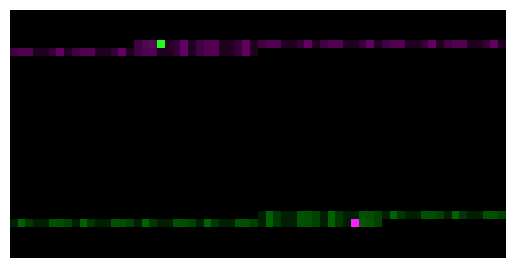

DONE


In [76]:
def convert_dataset_to_rgb_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        data = data.reshape(height, width)
        
        channel_1 = data.astype('float64')
        print(channel_1.shape)
        channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
        print(channel_2.shape)
        channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
        print(channel_3.shape)
        img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
        print(img.shape)
        
        plt.imshow(img)
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_rgb_image(df)

In [79]:
with open(csv_file, 'w') as f:
    np.savetxt(f, [np.array(["file_name", "label"])], delimiter=',', fmt='%s')

def convert_dataset_to_image(arr):
    with open(csv_file, 'a') as f:
        for idx, row in enumerate(arr):
            data = row[:-1]
            label = row[-1]
            if idx % 1000 == 0:
                print(idx, label)
            
            data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
            data = data.reshape(height, width)
            
            channel_1 = data.astype('float64')
            channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
            channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
            img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
            
            file_name = f"unswnb15_{idx}.png"
            cv2.imwrite(path+"\image\\"+file_name, img*255)
            
            log = np.array([file_name, label])
            np.savetxt(f, [log], delimiter=',', fmt='%s')
    print("DONE")
        

convert_dataset_to_image(df)

0 analysis
1000 backdoor
2000 dos
3000 dos
4000 dos
5000 exploits
6000 exploits
7000 exploits
8000 exploits
9000 exploits
10000 exploits
11000 exploits
12000 exploits
13000 exploits
14000 exploits
15000 exploits
16000 exploits
17000 fuzzers
18000 fuzzers
19000 fuzzers
20000 fuzzers
21000 fuzzers
22000 fuzzers
23000 fuzzers
24000 fuzzers
25000 fuzzers
26000 fuzzers
27000 fuzzers
28000 generic
29000 generic
30000 generic
31000 generic
32000 generic
33000 generic
34000 generic
35000 generic
36000 generic
37000 generic
38000 generic
39000 normal
40000 normal
41000 normal
42000 normal
43000 normal
44000 normal
45000 normal
46000 normal
47000 normal
48000 normal
49000 normal
50000 normal
51000 normal
52000 reconnaissance
53000 reconnaissance
54000 reconnaissance
55000 reconnaissance
56000 reconnaissance
57000 reconnaissance
58000 reconnaissance
59000 shellcode
DONE
